In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the list of ticker symbols
tickers = ['AAPL', 'ABNB', 'ACB', 'AMC', 'AMD', 'AMZN', 'APHA', 'ARKK', 'BABA', 'BB', 'BILI', 'BITO', 'BITW',
           'BNTX', 'BYND', 'CGC', 'COIN', 'CRON', 'DKNG', 'ETHE', 'FB', 'GBTC', 'GDXJ', 'GDX', 'GLD', 'GLXY',
           'GME', 'GOOGL', 'HOOD', 'MRNA', 'MSTR', 'NFLX', 'NIO', 'NOK', 'NVDA', 'PENN', 'PFE', 'PYPL', 'SLV',
           'SPY', 'SQ', 'TLRY', 'TSLA', 'TSLA', 'TSLA', 'TSM', 'TWTR', 'UBER', 'USO', 'WNDR', 'ZM']


In [2]:
pathname = '/Users/namirsacic/tokenized-assets/ftx'

# Create an empty list to store the dataframes
df_lists = []

# Loop over the list of tickers and create a new dataframe for each ticker
for ticker in tickers:
    filename = f'ftx_{ticker}USD.csv'
    filepath = os.path.join(pathname, filename)
    df = pd.read_csv(filepath)
    df['Volume'] = df['price'] * df['size']
    df_lists.append(df)

In [3]:
# Concatenate the list of dataframes into a single dataframe
combined_ftx_raw_df = pd.concat(df_lists)

In [37]:
combined_ftx_raw_df.head()

,Unnamed: 0,id,price,size,side,liquidation,time,Volume
0,0,5400896635,200.0,0.19,sell,False,2022-11-10T08:50:36.103957+00:00,38.00
1,1,5400821897,250.0,0.48,buy,False,2022-11-10T08:43:16.518694+00:00,120.00
2,2,5400805308,220.0,3.99,buy,False,2022-11-10T08:41:35.975076+00:00,877.80
3,3,5400650726,176.0,0.07,buy,False,2022-11-10T08:20:49.955655+00:00,12.32
4,4,5400639157,175.0,4.81,sell,False,2022-11-10T08:19:35.233163+00:00,841.75


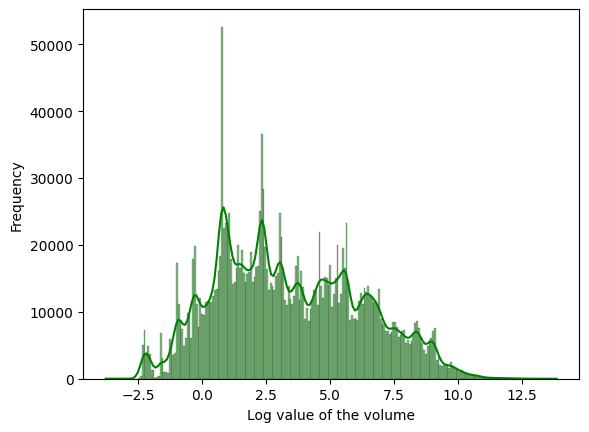

In [4]:
# Plot the histogram of FTX-Trade Volumes
plot = sns.histplot(np.log(combined_ftx_raw_df['Volume']), bins=250, kde=True, color='green')
plot.set(xlabel="Log value of the volume", ylabel="Frequency")
plt.show()

In [5]:
combined_ftx_raw_df_buy = combined_ftx_raw_df[combined_ftx_raw_df['side'] == 'buy']

# calculate product of price and size columns
combined_ftx_raw_df_buy['Buy Volume'] = combined_ftx_raw_df_buy['price'] * combined_ftx_raw_df_buy['size']

combined_ftx_raw_df_buy

/var/folders/xm/zbjsnt8j5sn16bwvmsxbqhmr0000gn/T/ipykernel_67316/1203202702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_ftx_raw_df_buy['Buy Volume'] = combined_ftx_raw_df_buy['price'] * combined_ftx_raw_df_buy['size']


,Unnamed: 0,id,price,size,side,liquidation,time,Volume,Buy Volume
1,1,5400821897,250.00,0.48,buy,False,2022-11-10T08:43:16.518694+00:00,120.0000,120.0000
2,2,5400805308,220.00,3.99,buy,False,2022-11-10T08:41:35.975076+00:00,877.8000,877.8000
3,3,5400650726,176.00,0.07,buy,False,2022-11-10T08:20:49.955655+00:00,12.3200,12.3200
24,24,5400202854,300.00,0.06,buy,False,2022-11-10T07:25:24.780952+00:00,18.0000,18.0000
25,25,5400200447,300.00,0.25,buy,False,2022-11-10T07:25:02.319916+00:00,75.0000,75.0000
...,...,...,...,...,...,...,...,...,...
9740,4740,203999815,453.32,1.65,buy,False,2020-11-27T12:54:51.582310+00:00,747.9780,747.9780
9741,4741,203467871,446.92,0.03,buy,False,2020-11-27T08:03:49.630003+00:00,13.4076,13.4076
9746,4746,186128881,441.57,0.04,buy,False,2020-11-21T06:18:21.260175+00:00,17.6628,17.6628
9748,4748,184516564,414.54,1.05,buy,False,2020-11-20T07:46:30.801334+00:00,435.2670,435.2670


In [6]:
combined_ftx_raw_df_sell = combined_ftx_raw_df[combined_ftx_raw_df['side'] == 'sell']

# calculate product of price and size columns
combined_ftx_raw_df_sell['Sell Volume'] = combined_ftx_raw_df_sell['price'] * combined_ftx_raw_df_sell['size']

combined_ftx_raw_df_sell

/var/folders/xm/zbjsnt8j5sn16bwvmsxbqhmr0000gn/T/ipykernel_67316/2989614037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_ftx_raw_df_sell['Sell Volume'] = combined_ftx_raw_df_sell['price'] * combined_ftx_raw_df_sell['size']


,Unnamed: 0,id,price,size,side,liquidation,time,Volume,Sell Volume
0,0,5400896635,200.00,0.19,sell,False,2022-11-10T08:50:36.103957+00:00,38.0000,38.0000
4,4,5400639157,175.00,4.81,sell,False,2022-11-10T08:19:35.233163+00:00,841.7500,841.7500
5,5,5400638256,175.00,10.00,sell,False,2022-11-10T08:19:28.759949+00:00,1750.0000,1750.0000
6,6,5400638104,175.00,9.29,sell,False,2022-11-10T08:19:27.725773+00:00,1625.7500,1625.7500
7,7,5400638103,175.37,0.07,sell,False,2022-11-10T08:19:27.725773+00:00,12.2759,12.2759
...,...,...,...,...,...,...,...,...,...
9742,4742,191729107,419.21,1.04,sell,False,2020-11-23T15:15:17.912204+00:00,435.9784,435.9784
9743,4743,191619756,425.62,0.01,sell,False,2020-11-23T14:33:50.917242+00:00,4.2562,4.2562
9744,4744,191609796,436.94,0.23,sell,False,2020-11-23T14:30:08.741011+00:00,100.4962,100.4962
9745,4745,191609795,436.94,0.01,sell,False,2020-11-23T14:30:08.741011+00:00,4.3694,4.3694


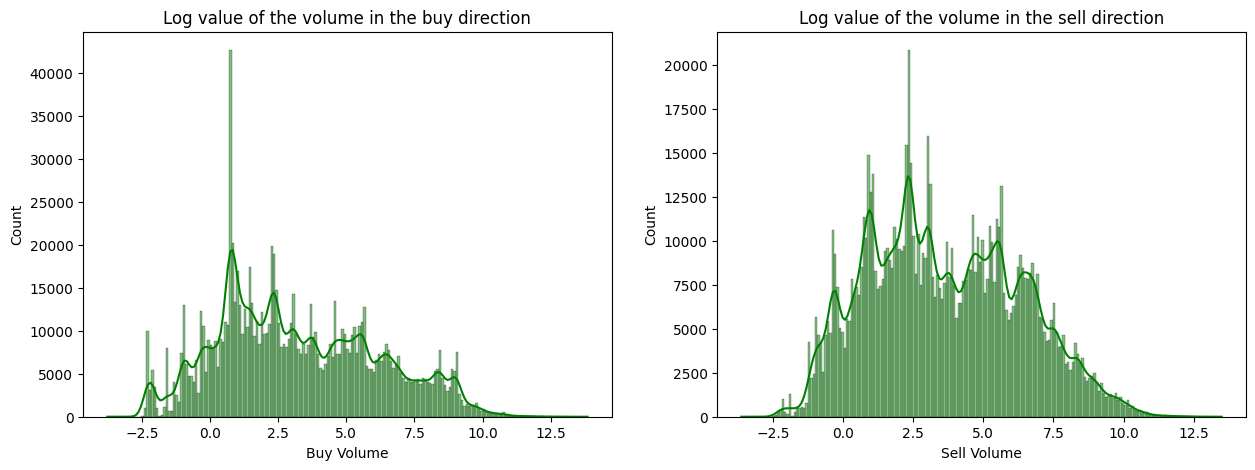

In [7]:
# plot the Histogram FTX-Trade Volumes based on the direction

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# plot the first seaborn plot on the first subplot with color blue
sns.histplot(np.log(combined_ftx_raw_df_buy["Buy Volume"]), kde=True, color="green", ax=ax1)
ax1.set(title="Log value of the volume in the buy direction")

sns.histplot(np.log(combined_ftx_raw_df_sell["Sell Volume"]), kde=True, color="green", ax=ax2)
ax2.set(title="Log value of the volume in the sell direction")

plot.set(ylabel = "Frequency")

plt.show()

In [8]:
# Define the path to the directory containing the CSV files
directory = '/Users/namirsacic/tokenized-assets/ftx'

# Function to preprocess the DataFrame
def preprocess_df(df):
    # Convert 'time' column to datetime type
    df['time'] = pd.to_datetime(df['time'], errors='coerce')
    df['date'] = df['time'].dt.date
    
    # Create a new DataFrame to store the processed data
    processed_df = pd.DataFrame(columns=['Average_Price', 'Average_Size', 'Weighted_Average_Price', 
                                         'Absolute_Volume', 'Relative_Volume', 'Count'])
    
    # Compute metrics for each date
    processed_df['Average_Price'] = df.groupby('date').agg({'price': 'mean'})
    processed_df['Average_Size'] = df.groupby('date').agg({'size': 'mean'})
    processed_df['Weighted_Average_Price'] = df.groupby('date').apply(lambda x: (x['price']*x['size']).sum() / x['size'].sum())
    processed_df['Absolute_Volume'] = df.groupby('date').apply(lambda x: (x['price']*x['size']).sum())
    processed_df['Count'] = df.groupby('date')['id'].count()
    
    # Compute Relative Volume
    df['side'] = df['side'].replace({'buy': 1, 'sell': -1})
    df['Adjusted_size'] = df['side'] * df['size']
    processed_df['Relative_Volume'] = df.groupby('date')['Adjusted_size'].sum()
    processed_df['Relative_Volume'] = processed_df['Relative_Volume'].cumsum()
    
    # Compute WAP for buys and sells separately
    buy_df = df[df['side']== 1]
    sell_df = df[df['side']== -1]
    processed_df['WAP_Buy'] = buy_df.groupby('date').apply(lambda x: (x['price']*x['size']).sum() / x['size'].sum())
    processed_df['WAP_Sell'] = sell_df.groupby('date').apply(lambda x: (x['price']*x['size']).sum() / x['size'].sum())

    return processed_df

# Create a list to store the DataFrames
df_files = []

# Iterate over the files in the directory and preprocess each DataFrame
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        processed_df = preprocess_df(df)
        df_files.append(processed_df)


In [9]:
# Concatenate the DataFrames
combined_df = pd.concat(df_files)

In [10]:
# Compute the total absolute volume for each date
sum_volume_daily = combined_df.groupby('date')['Absolute_Volume'].sum().reset_index()
sum_volume_daily = sum_volume_daily.rename(columns={'Absolute_Volume': 'Daily_Total_Absolute_Volume'})

In [11]:
sum_volume_daily

,date,Daily_Total_Absolute_Volume
0,2020-11-02,3.779867e+04
1,2020-11-03,8.750554e+03
2,2020-11-04,1.960800e+04
3,2020-11-05,9.754158e+03
4,2020-11-06,2.161620e+04
...,...,...
734,2022-11-06,1.213636e+06
735,2022-11-07,1.050086e+07
736,2022-11-08,1.310332e+07
737,2022-11-09,2.934959e+07


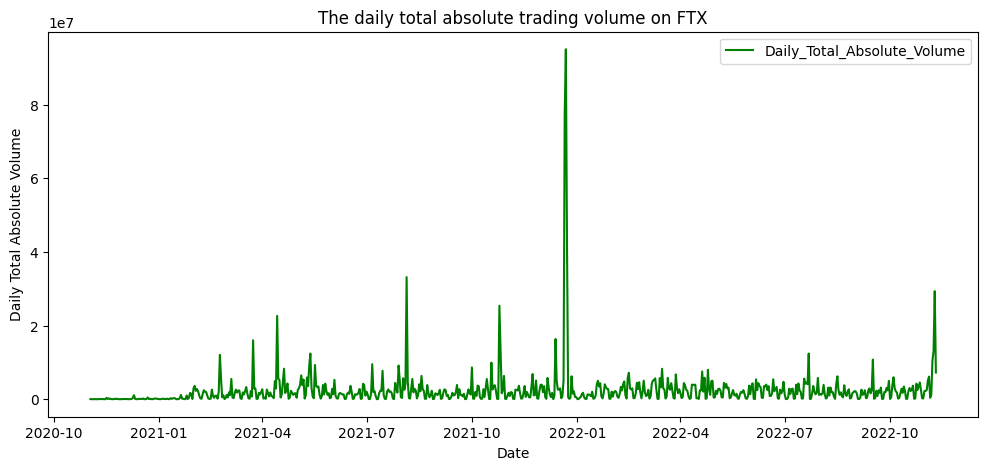

In [12]:
sum_volume_daily.plot(x='date' ,y='Daily_Total_Absolute_Volume', figsize=(12, 5), color='green')

# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('Daily Total Absolute Volume')
plt.title('The daily total absolute trading volume on FTX')

# Display the plot
plt.show()

In [13]:
sum_volume_daily

,date,Daily_Total_Absolute_Volume
0,2020-11-02,3.779867e+04
1,2020-11-03,8.750554e+03
2,2020-11-04,1.960800e+04
3,2020-11-05,9.754158e+03
4,2020-11-06,2.161620e+04
...,...,...
734,2022-11-06,1.213636e+06
735,2022-11-07,1.050086e+07
736,2022-11-08,1.310332e+07
737,2022-11-09,2.934959e+07


In [14]:
sum_volume_daily['date'] = pd.to_datetime(sum_volume_daily['date'])
sum_volume_weekly = sum_volume_daily.groupby(pd.Grouper(key='date', freq='W'))['Daily_Total_Absolute_Volume'].sum()
sum_volume_weekly = pd.DataFrame(sum_volume_weekly).reset_index()
sum_volume_weekly = sum_volume_weekly.rename(columns={'date': 'Weekly_Date', 'Daily_Total_Absolute_Volume': 'Weekly_Total_Absolute_Volume'})
sum_volume_weekly

,Weekly_Date,Weekly_Total_Absolute_Volume
0,2020-11-08,9.960774e+04
1,2020-11-15,2.190950e+05
2,2020-11-22,8.366583e+05
3,2020-11-29,3.747462e+05
4,2020-12-06,2.822142e+05
...,...,...
101,2022-10-16,1.207307e+07
102,2022-10-23,1.409509e+07
103,2022-10-30,1.774044e+07
104,2022-11-06,1.974512e+07


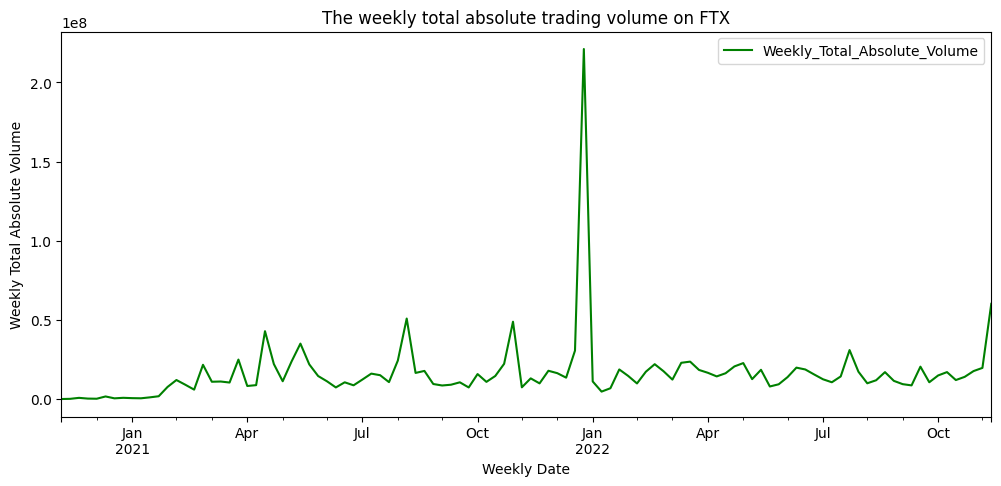

In [15]:
sum_volume_weekly.plot(x='Weekly_Date' ,y='Weekly_Total_Absolute_Volume', figsize=(12, 5),color='green')

# Add axis labels and title
plt.xlabel('Weekly Date')
plt.ylabel('Weekly Total Absolute Volume')
plt.title('The weekly total absolute trading volume on FTX')

# Display the plot
plt.show()

In [16]:
combined_df = pd.concat(df_files)
print(combined_df.index.min())
sum_rel_volume_daily = combined_df.groupby('date')['Relative_Volume'].sum()
sum_rel_volume_daily = sum_rel_volume_daily.reset_index()
sum_rel_volume_daily = sum_rel_volume_daily.rename(columns={'Relative_Volume': 'Daily_Total_Relative_Volume'})
sum_rel_volume_daily

2020-11-02


,date,Daily_Total_Relative_Volume
0,2020-11-02,-8.101400e+01
1,2020-11-03,-2.725800e+01
2,2020-11-04,4.288400e+01
3,2020-11-05,1.541200e+01
4,2020-11-06,-6.391800e+01
...,...,...
734,2022-11-06,3.141725e+06
735,2022-11-07,3.169712e+06
736,2022-11-08,3.170479e+06
737,2022-11-09,3.504821e+05


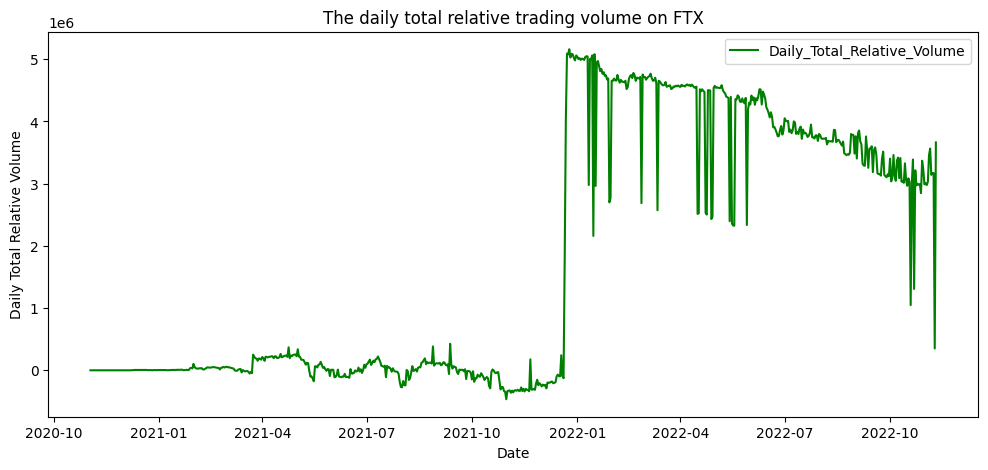

In [17]:
sum_rel_volume_daily.plot(x='date' ,y='Daily_Total_Relative_Volume', figsize=(12, 5), color='green')
plt.xlabel('Date')
plt.ylabel('Daily Total Relative Volume')
plt.title('The daily total relative trading volume on FTX')

# Display the plot
plt.show()

In [18]:
sum_rel_volume_daily['date'] = pd.to_datetime(sum_rel_volume_daily['date'])
sum_rel_volume_weekly = sum_rel_volume_daily.groupby(pd.Grouper(key='date', freq='W'))['Daily_Total_Relative_Volume'].sum()
sum_rel_volume_weekly = pd.DataFrame(sum_rel_volume_weekly).reset_index()
sum_rel_volume_weekly = sum_rel_volume_weekly.rename(columns={'date': 'Weekly_Date', 'Daily_Total_Relative_Volume': 'Weekly_Total_Relative_Volume'})
sum_rel_volume_weekly

,Weekly_Date,Weekly_Total_Relative_Volume
0,2020-11-08,-2.221210e+02
1,2020-11-15,-1.151629e+03
2,2020-11-22,-2.785313e+03
3,2020-11-29,-1.547829e+03
4,2020-12-06,-1.042092e+03
...,...,...
101,2022-10-16,2.185220e+07
102,2022-10-23,1.808200e+07
103,2022-10-30,2.138862e+07
104,2022-11-06,2.216805e+07


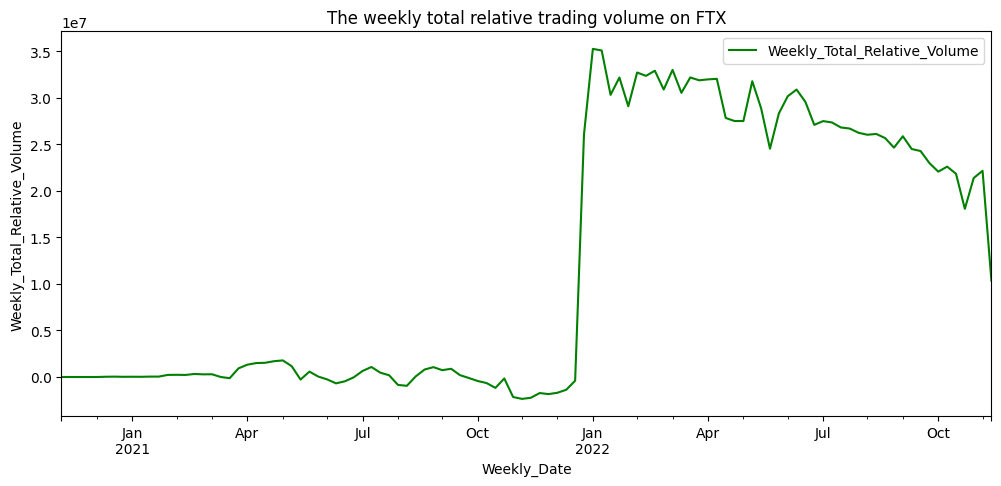

In [19]:
sum_rel_volume_weekly.plot(x='Weekly_Date' ,y='Weekly_Total_Relative_Volume', figsize=(12, 5), color='green')

# Add axis labels and title
plt.xlabel('Weekly_Date')
plt.ylabel('Weekly_Total_Relative_Volume')
plt.title('The weekly total relative trading volume on FTX')

# Display the plot
plt.show()

In [20]:
daily_folder = '/Users/namirsacic/tokenized-assets/daily_data'

In [21]:
# Get a list of all files in the daily folder
files = os.listdir(daily_folder)

# Load each file into a DataFrame and store them in a list
daily_files_df = []
for file in files:
    if file.endswith('.csv'):  # Only consider CSV files
        file_path = os.path.join(daily_folder, file)
        df = pd.read_csv(file_path)
        daily_files_df.append(df)

In [22]:
# Concatenate all the DataFrames into a single DataFrame
com_daily_underlying = pd.concat(daily_files_df)
com_daily_underlying['Average_HCLO_Price'] = (com_daily_underlying['HIGH'] + com_daily_underlying['CLOSE'] + com_daily_underlying['LOW'] + com_daily_underlying['OPEN'])/4
com_daily_underlying['Daily_Total_Absolute_Volume'] = com_daily_underlying['Average_HCLO_Price'] * com_daily_underlying['VOLUME']

com_daily_underlying= com_daily_underlying.sort_values('Date')
com_daily_underlying['Date'] = pd.to_datetime(com_daily_underlying['Date'])
com_daily_underlying = com_daily_underlying.groupby('Date')['Daily_Total_Absolute_Volume'].sum().reset_index()

In [23]:
com_weekly_underlying = com_daily_underlying.groupby(pd.Grouper(key='Date', freq='W'))['Daily_Total_Absolute_Volume'].sum()
com_weekly_underlying = pd.DataFrame(com_weekly_underlying).reset_index()
com_weekly_underlying = com_weekly_underlying.rename(columns={'Date': 'Weekly_Date', 'Daily_Total_Absolute_Volume': 'Weekly_Total_Absolute_Volume'})
com_weekly_underlying

,Weekly_Date,Weekly_Total_Absolute_Volume
0,2020-01-05,5.808490e+10
1,2020-01-12,1.675472e+11
2,2020-01-19,1.833570e+11
3,2020-01-26,1.632189e+11
4,2020-02-02,2.185092e+11
...,...,...
152,2022-12-04,2.684250e+11
153,2022-12-11,2.509322e+11
154,2022-12-18,3.419007e+11
155,2022-12-25,2.652272e+11


In [24]:
com_daily_underlying.set_index('Date', inplace=True)
com_daily_underlying

,Daily_Total_Absolute_Volume
Date,
2020-01-02,2.704767e+10
2020-01-03,3.103723e+10
2020-01-06,2.806495e+10
2020-01-07,3.258305e+10
2020-01-08,4.222448e+10
...,...
2022-12-23,4.518024e+10
2022-12-27,4.944233e+10
2022-12-28,4.897126e+10


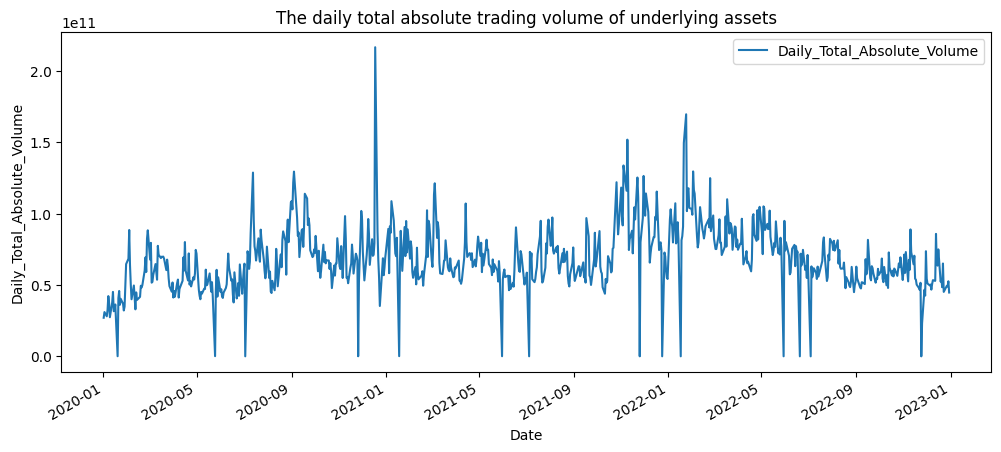

In [25]:
com_daily_underlying.plot(y='Daily_Total_Absolute_Volume', figsize=(12, 5))
plt.xlabel('Date')
plt.ylabel('Daily_Total_Absolute_Volume')
plt.title('The daily total absolute trading volume of underlying assets')
plt.show()

In [34]:
# Calculate the weekly moving average
weekly_ma = com_daily_underlying.rolling(window=5, center=True).mean()

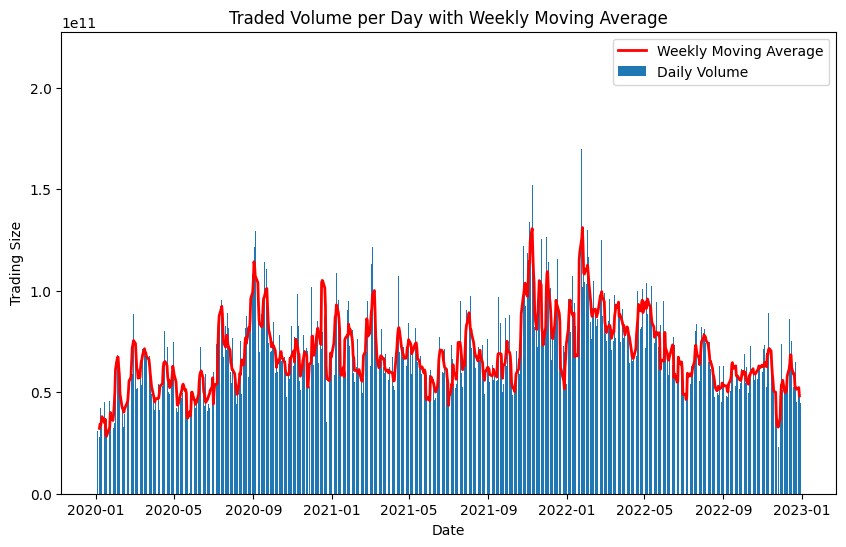

In [35]:
# Create the bar chart with moving average line
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(com_daily_underlying.index, com_daily_underlying['Daily_Total_Absolute_Volume'], width=1.0, label='Daily Volume')
ax.plot(weekly_ma.index, weekly_ma['Daily_Total_Absolute_Volume'], color='red', linewidth=2, label='Weekly Moving Average')
ax.set_xlabel('Date')
ax.set_ylabel('Trading Size')
ax.set_title('Traded Volume per Day with Weekly Moving Average')
ax.legend() # Add the legend to the plot
plt.show()

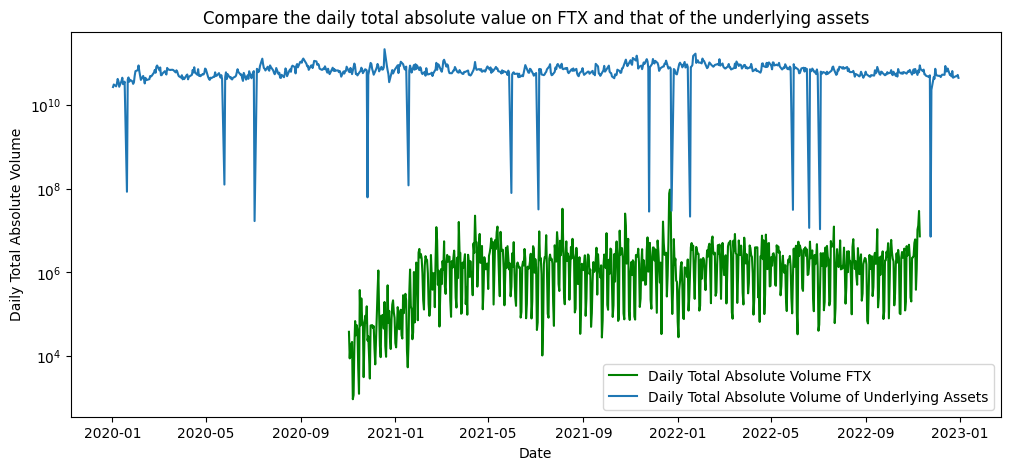

In [36]:
plt.figure(figsize=(12, 5))

plt.plot(sum_volume_daily['date'], sum_volume_daily['Daily_Total_Absolute_Volume'], label='Daily Total Absolute Volume FTX', color='green')
plt.plot(com_daily_underlying.index, com_daily_underlying['Daily_Total_Absolute_Volume'], label='Daily Total Absolute Volume of Underlying Assets')

plt.xlabel('Date')
plt.ylabel('Daily Total Absolute Volume')
plt.yscale("log")
plt.title('Compare the daily total absolute value on FTX and that of the underlying assets')

plt.legend()

plt.show()


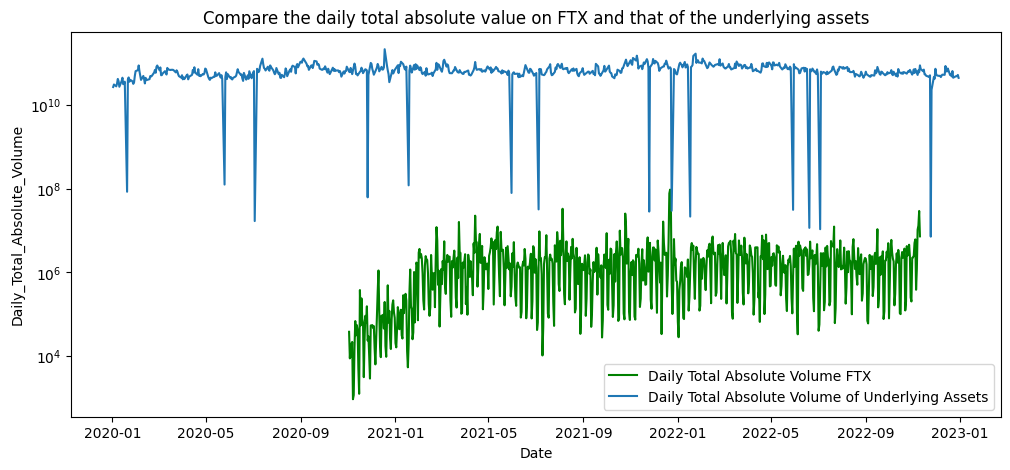

In [29]:
plt.figure(figsize=(12, 5))

# plot the lines
plt.plot(sum_volume_daily['date'], sum_volume_daily['Daily_Total_Absolute_Volume'], label='Daily Total Absolute Volume FTX', color='green')
plt.plot(com_daily_underlying.index, com_daily_underlying['Daily_Total_Absolute_Volume'], label='Daily Total Absolute Volume of Underlying Assets')

# add axis labels and title
plt.xlabel('Date')
plt.ylabel('Daily_Total_Absolute_Volume')
plt.title('Compare the daily total absolute value on FTX and that of the underlying assets')
plt.yscale('log')
# add legend
plt.legend()

# display the plot
plt.show()

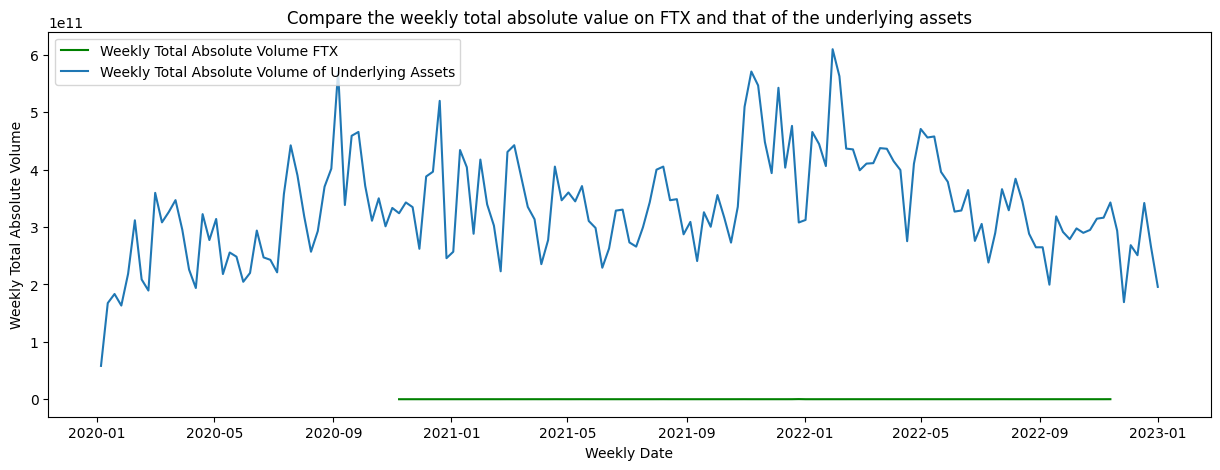

In [30]:
plt.figure(figsize=(15, 5))

# plot the lines
plt.plot(sum_volume_weekly['Weekly_Date'], sum_volume_weekly['Weekly_Total_Absolute_Volume'], label='Weekly Total Absolute Volume FTX', color='green')
plt.plot(com_weekly_underlying['Weekly_Date'], com_weekly_underlying['Weekly_Total_Absolute_Volume'], label='Weekly Total Absolute Volume of Underlying Assets')

# add axis labels and title
plt.xlabel('Weekly Date')
plt.ylabel('Weekly Total Absolute Volume')
plt.title('Compare the weekly total absolute value on FTX and that of the underlying assets')

# add legend
plt.legend()

# display the plot
plt.show()

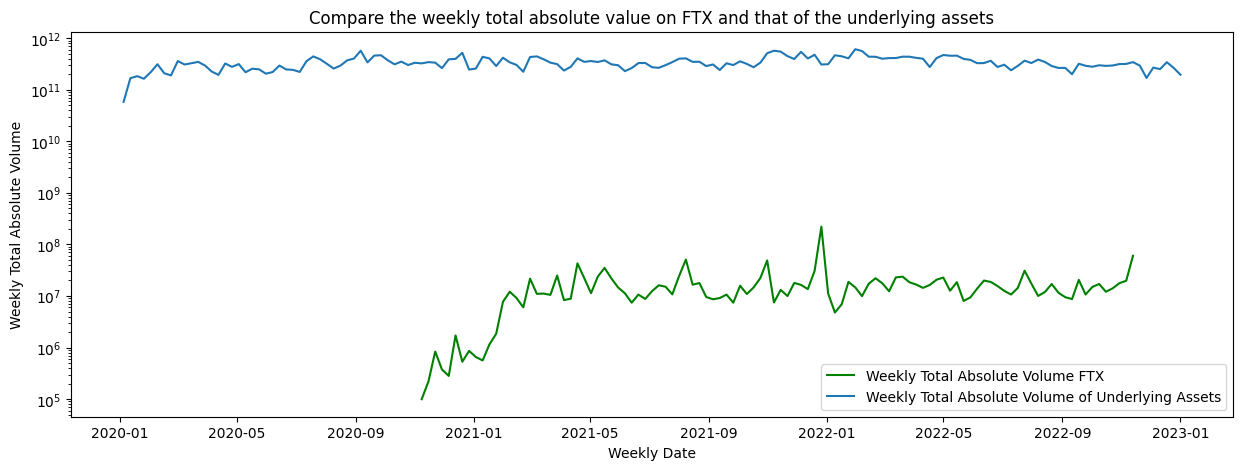

In [31]:
plt.figure(figsize=(15, 5))

# plot the lines
plt.plot(sum_volume_weekly['Weekly_Date'], sum_volume_weekly['Weekly_Total_Absolute_Volume'], label='Weekly Total Absolute Volume FTX', color='green')
plt.plot(com_weekly_underlying['Weekly_Date'], com_weekly_underlying['Weekly_Total_Absolute_Volume'], label='Weekly Total Absolute Volume of Underlying Assets')#,linestyle='--')

# add axis labels and title
plt.xlabel('Weekly Date')
plt.ylabel('Weekly Total Absolute Volume')
plt.title('Compare the weekly total absolute value on FTX and that of the underlying assets')
plt.yscale('log')
# add legend
plt.legend()

# display the plot
plt.show()

In [33]:
import os
import matplotlib.pyplot as plt

# Create a new directory for the plots
if not os.path.exists('graphs'):
    os.makedirs('graphs')

# Loop through all the figures and save them as PNG files
for i, fig in enumerate(plt.get_fignums()):
    fig.savefig(f'/Users/namirsacic/tokenized-assets/plots/graphs/figure_{i}.png')

# Close all figures to free up memory
plt.close('all')
